In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ast

In [2]:
data = pd.read_csv(r'C:\Users\giuli\Documents\GitHub\Progetto_BI2021\data.csv', parse_dates=['created_at'])
df = pd.DataFrame(data)

## DECODING DEL TESTO ALL INTERNO DELLA COLONNA `text`. 
All interno della colonna text è presente una rappresentazione di un bytes sotto forma di stringa. Questa può essere valutata attraverso la funzione `ast.literal_eval(string)` e quindi decodificata
#secondo la codifica appropriata tramite il metodo decode

In [3]:
text_enc = []
for i in range(0, df.text.size):
    txt= ast.literal_eval(df.text[i]).decode('utf-8')
    text_enc.append(txt)

df['text_enc'] = text_enc
df

,favorite_count,source,text,is_retweet,created_at,retweet_count,text_enc
0,1,Twitter for Android,b'La #monarqu\xc3\xada se burla a diario de lo...,False,2021-03-03 07:46:48+00:00,0,La #monarquía se burla a diario de los español...
1,0,Twitter for iPhone,b'@TitusNation the CON serving CONservative GO...,False,2021-03-03 17:22:21+00:00,0,@TitusNation the CON serving CONservative GOP ...
2,0,Twitter for Android,b'#Coronavirus\nAustria and Denmark are to sto...,False,2021-03-03 08:47:26+00:00,0,#Coronavirus\nAustria and Denmark are to stop ...
3,0,Twitter Web App,b'BMC launches \xe2\x80\x98Mission Zero\xe2\x8...,False,2021-03-01 12:23:57+00:00,0,BMC launches ‘Mission Zero’ in Mumbai again to...
4,0,Twitter for iPhone,b'@Gadaffyduck @IsabelOakeshott @AmandaHolden ...,False,2021-03-04 20:49:11+00:00,0,@Gadaffyduck @IsabelOakeshott @AmandaHolden Du...
...,...,...,...,...,...,...,...
4163,4,Tweetbot for Mac,"b'In other news, I have been jabbed with the f...",False,2021-03-02 19:18:52+00:00,0,"In other news, I have been jabbed with the fir..."
4164,5,Twitter Web App,"b""So nearly 10% of today's new cases are the n...",False,2021-03-04 22:56:28+00:00,4,So nearly 10% of today's new cases are the new...
4165,2,Twitter for Android,"b""Read this\n\nThen read it again\n\nWritten, ...",False,2021-03-04 07:46:47+00:00,1,"Read this\n\nThen read it again\n\nWritten, pr..."
4166,8,Twitter Web App,b'\xe2\x80\xbc\xef\xb8\x8fUpdate\xe2\x80\xbc\x...,False,2021-03-04 12:39:09+00:00,4,‼️Update‼️ Individuals who file an IRS Form 1...


## Pulizia dei Tweet
Attraverso le Regular Expressions vado a rimuovere elementi come:
* @menzioni
* Hashtag
* Link

In [19]:
import re

def cleanTxt(text):
 text=text.lower()
 text = re.sub('\S*trump\S*', 'trump', text)
 text = re.sub('\S*biden\S*', 'biden', text)
 text = re.sub('\S*clinton\S*', 'clinton', text)
 text = re.sub('@\S+', '', text) #Rimuove le @menzioni
 text = re.sub('#', '', text) # Rimuove l'hashtag
 text = re.sub('https?:\/\/\S+', '', text) # Rimuove i link
 text = re.sub('&amp', '', text) #Rimuove &amp
 text = re.sub('covid-19', 'covid', text ) #converte covid-19 in covid
 text = re.sub('covid19', 'covid', text ) #converte covid19 in covid
 text = re.sub('covid 19', 'covid', text ) #converte covid 19 in covid
 text = re.sub('coronavirus', 'covid', text)
 return text

def countMentions(text):
    return len(re.findall('@\S+', text))

def countHashtags(text):
    return len(re.findall('#', text))

def countLinks(text):
    return len(re.findall('https?:\/\/\S+', text))


df.text_enc=df.text_enc.astype('str')
df['text_clean'] = df.text_enc.apply(cleanTxt)
df['mentions'] = df.text_enc.apply(countMentions)
df['hashtags'] = df.text_enc.apply(countHashtags)
df['links'] = df.text_enc.apply(countLinks)


In [5]:
df

,favorite_count,source,text,is_retweet,created_at,retweet_count,text_enc,text_clean,mentions,hashtags,links
0,1,Twitter for Android,b'La #monarqu\xc3\xada se burla a diario de lo...,False,2021-03-03 07:46:48+00:00,0,La #monarquía se burla a diario de los español...,La monarquía se burla a diario de los españole...,0,7,1
1,0,Twitter for iPhone,b'@TitusNation the CON serving CONservative GO...,False,2021-03-03 17:22:21+00:00,0,@TitusNation the CON serving CONservative GOP ...,the CON serving CONservative GOP = Ghouls of ...,1,1,0
2,0,Twitter for Android,b'#Coronavirus\nAustria and Denmark are to sto...,False,2021-03-03 08:47:26+00:00,0,#Coronavirus\nAustria and Denmark are to stop ...,Coronavirus\nAustria and Denmark are to stop r...,0,2,1
3,0,Twitter Web App,b'BMC launches \xe2\x80\x98Mission Zero\xe2\x8...,False,2021-03-01 12:23:57+00:00,0,BMC launches ‘Mission Zero’ in Mumbai again to...,BMC launches ‘Mission Zero’ in Mumbai again to...,0,0,1
4,0,Twitter for iPhone,b'@Gadaffyduck @IsabelOakeshott @AmandaHolden ...,False,2021-03-04 20:49:11+00:00,0,@Gadaffyduck @IsabelOakeshott @AmandaHolden Du...,Dude.. y’all sound like the idiots. Y’all b...,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...
4163,4,Tweetbot for Mac,"b'In other news, I have been jabbed with the f...",False,2021-03-02 19:18:52+00:00,0,"In other news, I have been jabbed with the fir...","In other news, I have been jabbed with the fir...",0,0,0
4164,5,Twitter Web App,"b""So nearly 10% of today's new cases are the n...",False,2021-03-04 22:56:28+00:00,4,So nearly 10% of today's new cases are the new...,So nearly 10% of today's new cases are the new...,0,1,1
4165,2,Twitter for Android,"b""Read this\n\nThen read it again\n\nWritten, ...",False,2021-03-04 07:46:47+00:00,1,"Read this\n\nThen read it again\n\nWritten, pr...","Read this\n\nThen read it again\n\nWritten, pr...",0,0,1
4166,8,Twitter Web App,b'\xe2\x80\xbc\xef\xb8\x8fUpdate\xe2\x80\xbc\x...,False,2021-03-04 12:39:09+00:00,4,‼️Update‼️ Individuals who file an IRS Form 1...,‼️Update‼️ Individuals who file an IRS Form 1...,1,1,3


## Language Detection
il metodo `detect_langs` fornisce un vettore di possibilità riguardo la lingua del testo che sta analizzando. Vado a vedere se ci sono nel dataset testi ambigui (quindi quelli per cui la dimensione del `dict` ritornato da `detect_langs` è maggiore di 1).

Utilizzo `langdetect` che è abbastanza veloce per generare una previsione sommaria. Esso restituisce la probabilità per ciascuna lingua trovata quindi:
* se trovo una sola lingua tra quelle ammesse (en, es, fr) allora segno la lingua trovata e segno la detection come sicura
* se trovo più di una lingua oppure trovo come lingua più probabile una non ammessa segno la lingua e segno la detection come insicura/sbagliata (`unsure_wrong_detection=True`) 

In [6]:
from langdetect import detect_langs

unsure_count = 0
wrong_count = 0
i=0
lang_detect = []
unsure_wrong = []

for twt in df.text_enc:
    try:
        detection = detect_langs(twt)
        lang = detection[0].lang
        
        lang_detect.append(lang)
        unsure_wrong.append(False)
        
        if((lang != "en") and (lang != "es") and (lang != "fr")):
             wrong_count = wrong_count +1
             unsure_wrong[i]=True
        if(len(detection)>1):
            unsure_wrong[i]=True
            unsure_count = unsure_count+1

    except:
        print("errore alla posizione ")
        i
        print("testo : " + twt)
        lang_detect.append('None')
        unsure_wrong.append(True)

    i=i+1



df['langdetect']=lang_detect
df['unsure_wrong_detection'] = unsure_wrong

unsure_wrong_sum = df['unsure_wrong_detection'].sum()
unsure_wrong_sum

errore alla posizione 
testo : Vamos
⤵⤵⤵⤵⤵⤵⤵⤵⤵⤵⤵⤵ https://t.co/DJw64hxzfj


352

# Check traduzione attraverso API Google 
I tweet dei quali la traduzione non è sicura sono stati marcati con un `True` all'interno della colonna `unsure_wrong_detection`. Utilizzo questa informazione per passare i questi tweet all'interno dell'API Google per la traduzione. Questo metodo non è stato utilizzato prima in quanto le possibili chiamate ai server Google sono limitate e molto lente.

In [7]:
from textblob import TextBlob

lang_detect_final = []
i = 0
for twt in df.text_clean:
    if not df['unsure_wrong_detection'][i]:
        lang_detect_final.append(df['langdetect'][i])
    else:
        blob = TextBlob(twt)
        lang = blob.detect_language()
        if((lang != "en") and (lang != "es") and (lang != "fr")):
            lang_detect_final.append('None')
        else:
            lang_detect_final.append(lang)
            df['unsure_wrong_detection'][i]=False
    i=i+1

df['lang_detect_final'] = lang_detect_final

HTTPError: HTTP Error 429: Too Many Requests

In [8]:
df.unsure_wrong_detection.sum()

352

## Esportazione dei dati su formato Excel
Excel non supporta le date con le timezone quindi le ho dovute eliminare con il metodo `datetime.tz_localize()`

In [49]:
df_enc = df[['favorite_count', 'source', 'text_enc', 'text_clean', 'is_retweet', 'retweet_count', 'created_at', 'langdetect' , 'unsure_wrong_detection', 'lang_detect_final']]
df_enc.loc[:,'created_at_ntz']= df_enc.created_at.dt.tz_localize(None)

df_enc = df_enc.drop(columns='created_at')
df_enc.to_excel('data_dec.xlsx')

# Inizio dell'analisi
Dopo aver salvato i dati ripuliti all'interno del file Excel, uso questo come checkpoint per partire con l'analisi. Questo perché non è sempre possibile performare di nuovo la traduzione a causa delle restrizioni dell'api di Google descritte sopra

Dal momento che i Tweet la cui lingua non è stata riconosciuta sono meno dell' 1%, questi vengono filtrati. Dopodiché il dataset viene splittato per lingua in tre ```DataFrame``` 


In [17]:
data=pd.read_excel(r'C:\Users\giuli\Documents\GitHub\Progetto_BI2021\data_dec.xlsx')
df=pd.DataFrame(data)

df = df.drop(columns='langdetect')
df.loc[df['unsure_wrong_detection']==True].shape #controllo dei tweet la cui lingua non è stata riconosciuta
df = df.loc[df['unsure_wrong_detection']==False] #filtraggio dei tweet non riconosciuti

### Suddivisione dei Dataset per lingua ###

#en
df_en = df.loc[df['lang_detect_final']=='en']
df_en = df_en.drop(columns=['lang_detect_final', 'unsure_wrong_detection'])

#es
df_es = df.loc[df['lang_detect_final']=='es']
df_es = df_es.drop(columns=['lang_detect_final', 'unsure_wrong_detection'])

#fr
df_fr = df.loc[df['lang_detect_final']=='fr']
df_fr = df_fr.drop(columns=['lang_detect_final', 'unsure_wrong_detection'])


In [20]:
df_en.text_enc=df_en.text_enc.astype('str')
df_en['text_clean'] = df_en.text_enc.apply(cleanTxt)
df_en['mentions'] = df_en.text_enc.apply(countMentions)
df_en['hashtags'] = df_en.text_enc.apply(countHashtags)
df_en['links'] = df_en.text_enc.apply(countLinks)

df_en.to_excel('dataen.xlsx')

In [11]:
df_en

,Unnamed: 0,favorite_count,source,text_enc,text_clean,is_retweet,retweet_count,created_at_ntz,mentions,hashtags,links
1,1,0,Twitter for iPhone,@TitusNation the CON serving CONservative GOP ...,the CON serving CONservative GOP = Ghouls of ...,False,0,2021-03-03 17:22:21,1,1,0
2,2,0,Twitter for Android,#Coronavirus\nAustria and Denmark are to stop ...,Coronavirus\nAustria and Denmark are to stop r...,False,0,2021-03-03 08:47:26,0,2,1
3,3,0,Twitter Web App,BMC launches ‘Mission Zero’ in Mumbai again to...,BMC launches ‘Mission Zero’ in Mumbai again to...,False,0,2021-03-01 12:23:57,0,0,1
4,4,0,Twitter for iPhone,@Gadaffyduck @IsabelOakeshott @AmandaHolden Du...,Dude.. y’all sound like the idiots. Y’all b...,False,0,2021-03-04 20:49:11,3,0,1
5,5,0,Hootsuite Inc.,COVID-19 Shows Need for New Nursing Home Model...,COVID-19 Shows Need for New Nursing Home Model...,False,0,2021-03-01 20:45:03,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
4163,4163,4,Tweetbot for Mac,"In other news, I have been jabbed with the fir...","In other news, I have been jabbed with the fir...",False,0,2021-03-02 19:18:52,0,0,0
4164,4164,5,Twitter Web App,So nearly 10% of today's new cases are the new...,So nearly 10% of today's new cases are the new...,False,4,2021-03-04 22:56:28,0,1,1
4165,4165,2,Twitter for Android,"Read this\n\nThen read it again\n\nWritten, pr...","Read this\n\nThen read it again\n\nWritten, pr...",False,1,2021-03-04 07:46:47,0,0,1
4166,4166,8,Twitter Web App,‼️Update‼️ Individuals who file an IRS Form 1...,‼️Update‼️ Individuals who file an IRS Form 1...,False,4,2021-03-04 12:39:09,1,1,3


## Preprocessing del testo
Attraverso la libreria ```nltk``` viene effettuato il preprocessing del testo. Ogni tweet viene tokenizzato in parole che vengono filtrate dalle stopwords e stemmate attraverso il ```PorterStemmer```. I tweet, una volta stemmati vengono salvati nella colonna text_stem e quindi per comodità de-tokenizzati.

In [21]:
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
porter = PorterStemmer()

df_en.text_clean=df_en.text_clean.astype('str')

text_stem = []
#df_en['text_clean']=df_en['text_clean'].astype('str')

for twt in df_en.text_clean:
    tweet = twt.lower()
    token_words = word_tokenize(tweet) #tokenizzazione
    token_filter_words = [w for w in token_words if not w in stop_words] #stopword filtering
    stem_sentence=[]
    for word in token_filter_words:
        stem_sentence.append(porter.stem(word)) #stemming
        stem_sentence.append(' ')
    
    text_stem.append(''.join(stem_sentence))

df_en['text_stem']=text_stem

## Tf-Idf
A questo punto viene performata la Tf-Idf sui tweet stemmati al punto precedenti. Per comodità di visualizzazione viene creato un dataframe per visualizzare la matrice tf-idf e generare una classifica delle parole: lo score di ciascuna parola è la media del tf-idf della parola in tutti i tweet. Vengono visualizzati i termini con score maggiore.

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidfVectorizer = TfidfVectorizer(min_df=0.005, #max_df=0.1,
                                 stop_words='english')
tfidf_en_matrix = tfidfVectorizer.fit_transform(df_en.text_stem)

## Conversione TfIdf in Dataframe ##

# tfidfVectorizer ritorna una matrice sparsa che non permette la visualizzazione agevole della matrice TfIdf

tf_idf_en = pd.DataFrame(columns=tfidfVectorizer.get_feature_names(), index=df_en.text_clean, dtype=float)

M = tfidf_en_matrix.todense()
for i in range(0, df_en.shape[0]):
    tf_idf_en.iloc[i, :]=M[i,:]

## classifica delle parole
score={}
for word in tfidfVectorizer.get_feature_names():
    score[word]= tf_idf_en[word].mean()

score_sroted = dict(sorted(score.items(), key=lambda item: item[1], reverse=True))
list(score_sroted.items())[0:30]

[('covid', 0.10713194782993343),
 ('vaccin', 0.058122695421392194),
 ('new', 0.021349394159538973),
 ('pandem', 0.020707242511844585),
 ('peopl', 0.020353897993066257),
 ('case', 0.020313515213253162),
 ('death', 0.015557672891619852),
 ('year', 0.01501610345522534),
 ('test', 0.014675804381406308),
 ('time', 0.014508192720551582),
 ('news', 0.01407798232284183),
 ('health', 0.01391751973170271),
 ('state', 0.01384335974872097),
 ('make', 0.013041164579905225),
 ('say', 0.012915906497732632),
 ('mask', 0.012819465858309422),
 ('need', 0.01271815717760838),
 ('report', 0.012272768985682178),
 ('help', 0.011765874383629816),
 ('texa', 0.011570939248291955),
 ('like', 0.011355713190842569),
 ('march', 0.01132052838708476),
 ('live', 0.010873217372781767),
 ('work', 0.010318211172297415),
 ('relief', 0.01027424764275148),
 ('week', 0.009884135578162749),
 ('school', 0.009747697199553542),
 ('know', 0.009662962551310338),
 ('day', 0.009622297445567815),
 ('updat', 0.009351504693779033)]

## Prova di Feature reduction
Provo a ridurre le features non alla cieca come il parametro ```min_df``` della Tf Idf ma preservando le informazioni all'interno del dataset.
La PCA è giustificata dalla non necessità di interpretare le feature.

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
#Standardizzo i dati
scaler = StandardScaler()
M= scaler.fit_transform(M)

#Applico la PCA mantenendo il 95% della varianza
pca=PCA(0.95)
M = pca.fit_transform(M)

print(tf_idf_en.shape[1], pca.n_components_)

411 369


# K-means Clustering
Viene performato un algoritmo di K-means Clustering, valutando i valori di K e plottando la Sum of Square Differences.

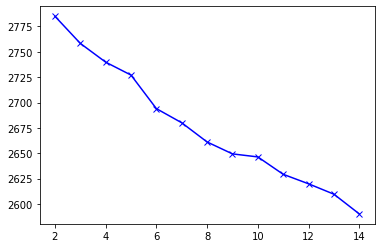

In [26]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

SSD = []
K=range(2,15)

for k in K:
    km=KMeans(n_clusters=k, max_iter=200, n_init=10)
    km = km.fit(tfidf_en_matrix)
    SSD.append(km.inertia_)

plt.plot(K, SSD, 'bx-')

In [96]:
SSD

[2791.5882573706726,
 2774.8507214197793,
 2757.7382724185163,
 2742.466038546564,
 2720.7401857133577,
 2705.600966845605,
 2691.88539203055,
 2705.539194453411,
 2669.877559052904,
 2651.325969644029,
 2641.6926055912945,
 2631.102581230982,
 2625.412927217017]

Si sceglie un valore di k=5, si performa il clustering e si aggiunge l'informazione di labeling al dataframe

In [27]:
k=9

model = KMeans(n_clusters=k)
model.fit(tfidf_en_matrix)

df_en['label_kmeans']=model.labels_


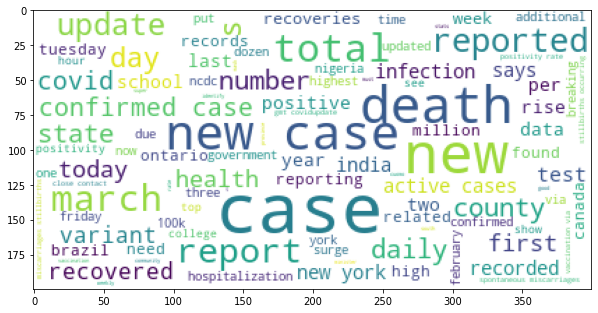

In [47]:

from wordcloud import WordCloud

frequent_words=['covid']

df_en_0 = df_en.loc[df_en['label_kmeans']==8]
text = df_en_0['text_clean'].str.cat(sep='')
text = text.lower()
text=' '.join([word for word in text.split() if not word in frequent_words])
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
fig1 = plt.figure(figsize=(10,10))
plt.imshow(wordcloud)

In [38]:
text

'the con serving conservative gop = ghouls of politics, group of perpetrator’s believe in, ; practice in, socialism, but only for the rich ; 🖕🏻 everyone else, which has not been more pronounced then during the crisis! gop hypocrisy!what does this mean im lost they are literally telling yall they clicked up to try kill us. 2+2=4 chesa is worst than covid. hundreds dead from drug overdoses and thousand of addicts because he doesn\'t prosecute anyone.well deserved, now to look forward to the theibroxvarient why and how should prioritize social protection in lower-income countries don\'t forget kenneth walker: &gt;&gt;"if a family member of mine died due to infection, after a doctor refused to use intravenous vitamin c, i would challenge his or her treatment in a court of law. i would win." (kenneth walker, md, surgeon)&lt;&lt;on feb. 26, desantis added people &lt;65 deemed "extremely vulnerable" to by a physician to the list of those eligible to get the shot. effect. march 3, teachers, fi

# DB Scan Clustering

In [113]:
from sklearn.cluster import DBSCAN

clustering = DBSCAN(eps=1).fit(M)


df_en['labels_DBSCAN']= clustering.labels_



In [114]:
df_en.loc[df_en['labels_DBSCAN']==-1]

,Unnamed: 0,favorite_count,source,text_enc,text_clean,is_retweet,retweet_count,created_at_ntz,text_stem,label_kmeans,labels_DBSCAN
1,1,0,Twitter for iPhone,@TitusNation the CON serving CONservative GOP ...,the CON serving CONservative GOP = Ghouls of ...,False,0,2021-03-03 17:22:21,"con serv conserv gop = ghoul polit , group per...",4,-1
2,2,0,Twitter for Android,#Coronavirus\nAustria and Denmark are to stop ...,Coronavirus\nAustria and Denmark are to stop r...,False,0,2021-03-03 08:47:26,coronaviru austria denmark stop reli sole euro...,4,-1
4,4,0,Twitter for iPhone,@Gadaffyduck @IsabelOakeshott @AmandaHolden Du...,Dude.. y’all sound like the idiots. Y’all b...,False,0,2021-03-04 20:49:11,dude .. ’ sound like idiot . ’ believ industri...,4,-1
5,5,0,Hootsuite Inc.,COVID-19 Shows Need for New Nursing Home Model...,COVID-19 Shows Need for New Nursing Home Model...,False,0,2021-03-01 20:45:03,covid-19 show need new nurs home model — ’ hap...,4,-1
6,6,2,Twitter for iPhone,what does this mean im lost https://t.co/wFZnN...,what does this mean im lost,False,0,2021-03-04 14:50:09,mean im lost,4,-1
...,...,...,...,...,...,...,...,...,...,...,...
4163,4163,4,Tweetbot for Mac,"In other news, I have been jabbed with the fir...","In other news, I have been jabbed with the fir...",False,0,2021-03-02 19:18:52,"news , jab first dose covid-19 vaccin today , ...",4,-1
4164,4164,5,Twitter Web App,So nearly 10% of today's new cases are the new...,So nearly 10% of today's new cases are the new...,False,4,2021-03-04 22:56:28,nearli 10 % today 's new case new variant ? we...,4,-1
4165,4165,2,Twitter for Android,"Read this\n\nThen read it again\n\nWritten, pr...","Read this\n\nThen read it again\n\nWritten, pr...",False,1,2021-03-04 07:46:47,"read read written , presum journalist without ...",4,-1
4166,4166,8,Twitter Web App,‼️Update‼️ Individuals who file an IRS Form 1...,‼️Update‼️ Individuals who file an IRS Form 1...,False,4,2021-03-04 12:39:09,"‼️update‼️ individu file ir form 1040 , schedu...",4,-1


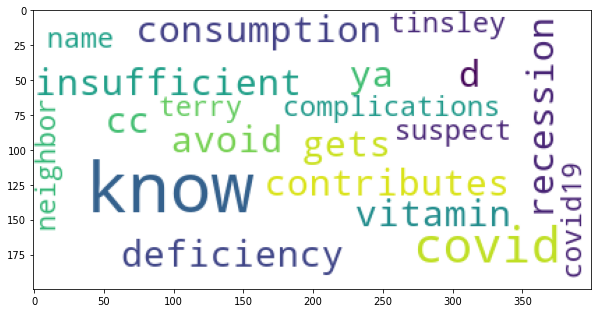

In [115]:
from wordcloud import WordCloud

df_en_0 = df_en.loc[df_en['labels_DBSCAN']==4]
text = df_en_0['text_clean'].str.cat(sep='')
text = text.lower()
text=' '.join([word for word in text.split()])
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
fig1 = plt.figure(figsize=(10,10))
plt.imshow(wordcloud)

In [89]:
pip install wikipedia

Using legacy setup.py install for wikipedia, since package 'wheel' is not installed.
    Running setup.py install for wikipedia: started
    Running setup.py install for wikipedia: finished with status 'done'
Note: you may need to restart the kernel to use updated packages.
You should consider upgrading via the 'C:\Users\giuli\AppData\Local\Programs\Python\Python38\python.exe -m pip install --upgrade pip' command.
